## Pick an Image, Create two Boxes with same dimentions of the image then do FFT for all the 3 images

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
def display_image(image, title):
    plt.imshow(np.log1p(image), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

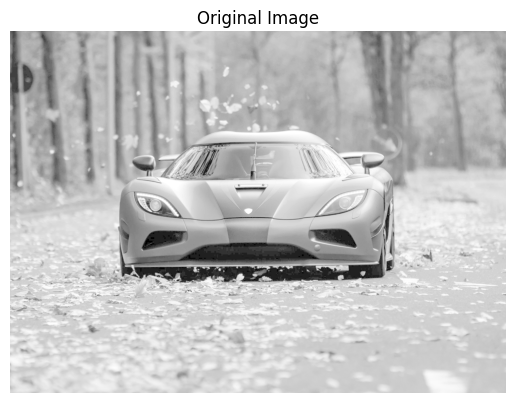

In [3]:
image_path = 'car.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
display_image(image, 'Original Image')

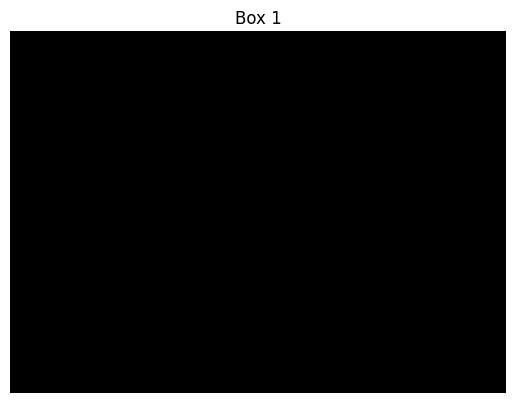

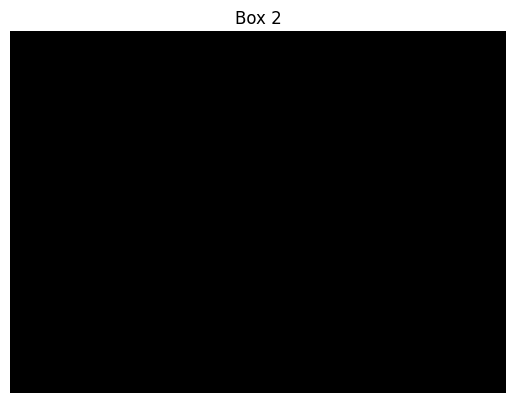

In [4]:
def create_box(size, value=255):
    return np.full((size, size), value, dtype=np.float32)

height, width = image.shape
box1 = create_box(height, value=100)  # Box with value 100
box2 = create_box(width, value=200)   # Box with value 200

# Ensure boxes have the same dimensions as the image
box1 = cv2.resize(box1, (width, height))
box2 = cv2.resize(box2, (width, height))

# Display the boxes
display_image(box1, 'Box 1')
display_image(box2, 'Box 2')

In [5]:
def compute_fft(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude = np.abs(dft_shift)
    return magnitude

fft_image = compute_fft(image)
fft_box1 = compute_fft(box1)
fft_box2 = compute_fft(box2)

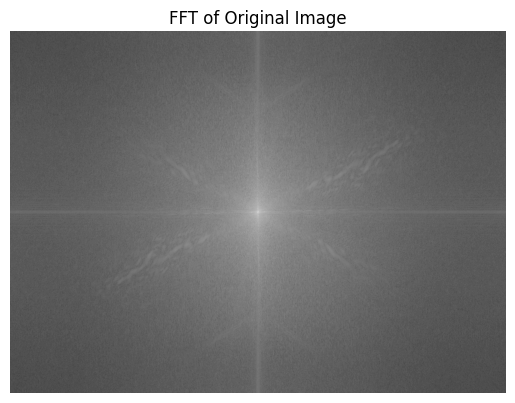

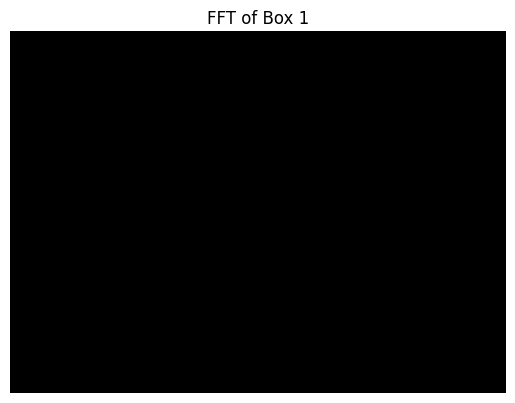

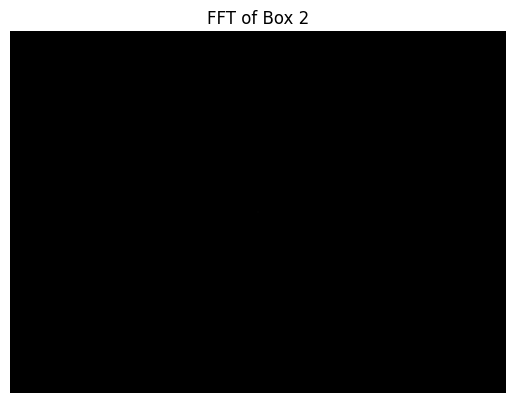

In [6]:
display_image(fft_image, 'FFT of Original Image')
display_image(fft_box1, 'FFT of Box 1')
display_image(fft_box2, 'FFT of Box 2')